# Would you become a data scientist?  
# Let's explore skills required and salary expectations from some job listings!

## by Mariangela Bonghi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I started studiyng in the marvellous world of data one year ago. The more I learn the more I found to be studied. If you want to become a data scientist you can find yourself overwhelmed by the number of tools and concepts and you maybe wonder yourself what are the skill most required or, what is the salary expectation or what kind of industry has the higher demands of data scientist. I have found on [Kaggle](https://www.kaggle.com/andrewmvd/data-scientist-jobs) an interesting dataset created by [picklesueat](https://github.com/picklesueat/data_jobs_data) that contains more than 3900 job listing for data scientist positions, with features such as:

- Salary Estimate
- Location
- Company Rating
- Job Description
- and more.

So, let's start this investigation and try answer some questions!



### Import statements for the packages that are going to be used

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning
In this section we load the data and see the general structure of the dataset. If necessary, we will take some actions on the data in order to prepare them for the analysis.


### General Properties

In [203]:
# Read dataset
df=pd.read_csv('DataScientist.csv')
df.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1


In [204]:
#number of samples and number of columns
df.shape

(3909, 17)

In [205]:
#check for duplicated columns in the dataset: there are no duplicates in the dataset
df.duplicated().sum()

0

In [206]:
#General information about data: there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In the dataset there are 17 columns and 3909 rows and there are no duplicate rows.

In [207]:
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

We make a copy of the dataset and we drop all the columns that we are not going to be used. For the remaining columns, we rename them removing spaces and using lowercase.

In [208]:
#Copy of the dataset
df_copy=df

In [209]:
#Put in lower case all the column names
df_copy.columns=df_copy.columns.str.lower()

In [210]:
df_copy.columns

Index(['unnamed: 0', 'index', 'job title', 'salary estimate',
       'job description', 'rating', 'company name', 'location', 'headquarters',
       'size', 'founded', 'type of ownership', 'industry', 'sector', 'revenue',
       'competitors', 'easy apply'],
      dtype='object')

In [211]:
#drop the columns that we are not going to use
df_copy.drop(['unnamed: 0','index','job title','company name','headquarters','founded','type of ownership',
              'sector','competitors','easy apply'], axis=1, inplace=True)

In [212]:
# Removing spaces from column name "salary estimate" and "job description"
df_copy = df_copy.rename(columns={'salary estimate': 'salary_estimate'});
df_copy = df_copy.rename(columns={'job description': 'job_description'});

In [213]:
#datatypes of columns
df_copy.dtypes

salary_estimate     object
job_description     object
rating             float64
location            object
size                object
industry            object
revenue             object
dtype: object

In [214]:
#datatypes of "object" columns
type(df_copy['salary_estimate'][0]),\
type(df_copy['job_description'][0]),\
type(df_copy['location'][0]),\
type(df_copy['size'][0]),\
type(df_copy['industry'][0]),\
type(df_copy['revenue'][0])

(str, str, str, str, str, str)

We don't take any actions on data types

### Cleaning "salary_estimate" column

In [215]:
#exploring values in the column
df_copy['salary_estimate'].value_counts()

$93K-$151K (Glassdoor est.)         62
$113K-$180K (Glassdoor est.)        61
$111K-$175K (Glassdoor est.)        60
$71K-$122K (Glassdoor est.)         60
$119K-$147K (Glassdoor est.)        44
                                    ..
$39K-$71K (Glassdoor est.)           7
$99K-$173K (Glassdoor est.)          6
$146K-$175K (Glassdoor est.)         3
$10-$26 Per Hour(Glassdoor est.)     3
$41K-$74K (Glassdoor est.)           1
Name: salary_estimate, Length: 148, dtype: int64

Let's clean this data adding two columns: the minimum and the maximum salary. In order to do this we split the values in two columns and we remove the charachters. In addition we can see that some values are expressed in salary per hour. We assume that we work 8 hours per days, 20 days per months and 12 months per year and transform that data in an annual salary.

In [216]:
#Find all the rows that contains salary per hour
df_copy[df_copy['salary_estimate'].str.contains("Hour")].salary_estimate.value_counts()

$17-$27 Per Hour(Glassdoor est.)    11
$34-$53 Per Hour(Glassdoor est.)     7
$10-$26 Per Hour(Glassdoor est.)     3
Name: salary_estimate, dtype: int64

We can see that there are three strings in which the salary is expressed per hour.
- For the first case:  
17 * 8hours * 20days * 12months = 32640  
27 * 8hours * 20days * 12months = 51840  
> We replace "$17-$27 Per Hour(Glassdoor est.)" with "$32640-$51840"  
- For the second case:  
34 * 8hours * 20days * 12months = 65280  
53 * 8hours * 20days * 12months = 101760  
>  We replace "$34-$53 Per Hour(Glassdoor est.)" with "$65280-$101760"  
- For the third case:  
10 * 8hours * 20days * 12months = 19200  
26 * 8hours * 20days * 12months = 49920  
>  We replace "$10-$26 Per Hour(Glassdoor est.)" with "$19200-$49920"  

In [217]:
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$17-$27 Per Hour(Glassdoor est.)','32640-51840',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$34-$53 Per Hour(Glassdoor est.)','65280-101760',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$10-$26 Per Hour(Glassdoor est.)','19200-49920',regex=False)

Exploring the dataset via excel, we can notice that the most of the rows contain the string '(Glassdoor est.)', but there are also rows that contain the string "(Employer est.)":

In [218]:
df_copy[df_copy['salary_estimate'].str.contains("(Employer est.)")].salary_estimate.value_counts()

/Users/Arirammstein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


$82K-$129K(Employer est.)     30
$200K-$250K(Employer est.)    29
Name: salary_estimate, dtype: int64

Now we can remove all the string in order to have only numerical values

In [219]:
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('(Glassdoor est.)','',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$','',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('K','000',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('(Employer est.)','',regex=False);

Finally, we can split the column in two different columns and drop the original one:

In [220]:
df_copy[['salary_min','salary_max']] = df_copy.salary_estimate.str.split("-",expand=True,)

In [221]:
df_copy.drop(['salary_estimate'], axis=1, inplace=True)

In [222]:
# convert the new two columns as numeric
df_copy[["salary_min", "salary_max"]] = df_copy[["salary_min", "salary_max"]].apply(pd.to_numeric)

We take a look at these two new columns. The curves are both skewed to the left and have more or less the same trend.

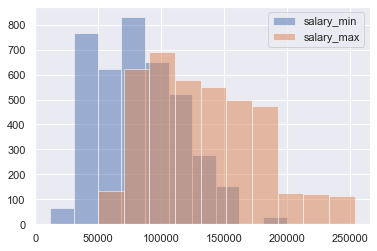

In [223]:
num_bins= 10
plt.hist(df_copy['salary_min'], num_bins, label='salary_min', alpha=0.5);
plt.hist(df_copy['salary_max'], num_bins, label='salary_max', alpha=0.5);
plt.legend(loc='upper right')
plt.show()

### Extract skill from "job_description" column

From the job_description column we extract some skills required and we will create for each one a new column in the dataset. As a first step we trasform in upper case all the rows of the column, later we find the following skills: Looker, Tableau, SQL, Python, R, Excel, Julia, Scala, Matlab and degree

In [224]:
# Upper case for all the rows of job description column
df_copy['job_description'] = df_copy['job_description'].str.upper()

In the case of R language, we can see in the dataset that we can find "R" with the following string " R ", " R,", "/R","R/","(R","R)": we replace all of these with "ERRE"

In [225]:
df_copy['job_description'] = df_copy['job_description'].str.replace(' R,','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace(' R ','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('/R','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('R/','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('(R','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('R)','ERRE',regex=False);

In [226]:
skill =['LOOKER','TABLEAU','SQL','PYTHON','EXCEL','JULIA','SCALA','MATLAB','DEGREE']

For all the skills above we create a column with the following values: 1 if the job description contains the skill, 0 if the job description doesn't contain the skill.

In [227]:
for s in skill:
    df_copy[s] = df_copy['job_description'].map(lambda x: 1 if s in str(x) else 0);
df_copy['R'] = df_copy['job_description'].map(lambda x: 1 if 'ERRE'  in str(x) else 0);

### Cleaning "location" column

In [228]:
df_copy['location'].head(5)

0     New York, NY
1     New York, NY
2     New York, NY
3    Lyndhurst, NJ
4     New York, NY
Name: location, dtype: object

In the location column there are the city and the state divided by ",". We will remove the city and left only the state.

In [229]:
df_copy[['to_drop','location']] = df_copy.location.str.split(",",expand=True,)

In [230]:
df_copy.drop(['to_drop'], axis=1, inplace=True)

In [231]:
df_copy.location.value_counts()

 TX                1253
 CA                1069
 IL                 363
 PA                 324
 NY                 313
 AZ                 295
 OH                 177
 FL                  69
 NJ                  32
 DE                  10
 United Kingdom       4
Name: location, dtype: int64

We replace the state code with the full name:

In [232]:
df_copy['location'] = df_copy['location'].str.replace('TX','Texas',regex=False);
df_copy['location'] = df_copy['location'].str.replace('CA','California',regex=False);
df_copy['location'] = df_copy['location'].str.replace('IL','Illinois',regex=False);
df_copy['location'] = df_copy['location'].str.replace('PA','Pennsylvania',regex=False);
df_copy['location'] = df_copy['location'].str.replace('NY','New York',regex=False);
df_copy['location'] = df_copy['location'].str.replace('AZ','Arizona',regex=False);
df_copy['location'] = df_copy['location'].str.replace('OH','Ohio',regex=False);
df_copy['location'] = df_copy['location'].str.replace('FL','Florida',regex=False);
df_copy['location'] = df_copy['location'].str.replace('NJ','New Jersey',regex=False);
df_copy['location'] = df_copy['location'].str.replace('DE','Delaware',regex=False);

### Cleaning the "size" column

In [233]:
df_copy['size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
-1                         229
5001 to 10000 employees    219
Unknown                     77
Name: size, dtype: int64

From the above list we see also a "-1" value. We assume that in those cases the size of the company is unknown:

In [234]:
df_copy['size'] = df_copy['size'].str.replace('-1','Unknown',regex=False);

### Cleaning "revenue" column

In [237]:
df_copy['revenue'].value_counts()

Unknown / Non-Applicable            1392
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: revenue, dtype: int64

From the above list we see also a "-1" value. We assume that in those cases the revenue of the company is unknown:

In [236]:
df_copy['revenue'] = df_copy['revenue'].str.replace('-1','Unknown / Non-Applicable',regex=False);

<a id='eda'></a>
## Exploratory data analysis

### What are the most required skills?

In [238]:
skill =['LOOKER','TABLEAU','SQL','PYTHON','EXCEL','JULIA','SCALA','MATLAB','DEGREE','R']

In [239]:
skill_counts = df_copy[skill].sum()
print(skill_counts)

LOOKER       78
TABLEAU     673
SQL        2022
PYTHON     2057
EXCEL      1855
JULIA        20
SCALA       877
MATLAB      197
DEGREE     2252
R          2710
dtype: int64


In [240]:
skill_counts.index.values

array(['LOOKER', 'TABLEAU', 'SQL', 'PYTHON', 'EXCEL', 'JULIA', 'SCALA',
       'MATLAB', 'DEGREE', 'R'], dtype=object)

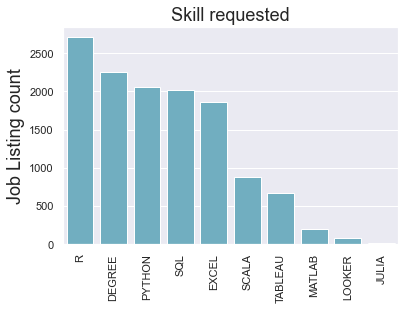

In [241]:
color_graph=sns.color_palette()[9]
order_list =['R','DEGREE','PYTHON','SQL','EXCEL','SCALA','TABLEAU','MATLAB','LOOKER','JULIA']
sns.barplot(x=skill_counts.index.values, y=skill_counts,color=color_graph,order=order_list)
plt.xticks(rotation=90) 
plt.title('Skill requested',fontsize=18)
plt.ylabel('Job Listing count',fontsize=18);

It seems that R is very popular followed by Python, SQL and Excel. I was particularly interested in the degree and it seems that the companies that are looking for a data scientist are really interested in a degree.

### What about location?

The dataset contains job listings from different states of United State, apart for 4 job listings that are from United Kingdom. I am from Italy so this part it's not very interesting to me, but for all of you that live in that area can be interesting. So let's take a look at the data.

In [242]:
df_location=df_copy.location.value_counts()

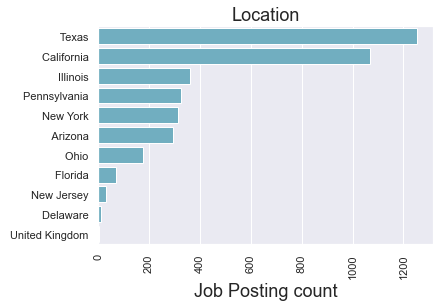

In [243]:
color_graph=sns.color_palette()[9]
sns.barplot(x=df_location, y=df_location.index.values,color=color_graph)
plt.xticks(rotation=90) 
plt.title('Location',fontsize=18)
plt.xlabel('Job Posting count',fontsize=18);

From the above graph, it seems that Texas and California are the states with the majority of requests of data scientist. Before moving there let's take a look at the salary expectations in that area.

Text(0.5, 1.0, 'Minimum Salary vs Location')

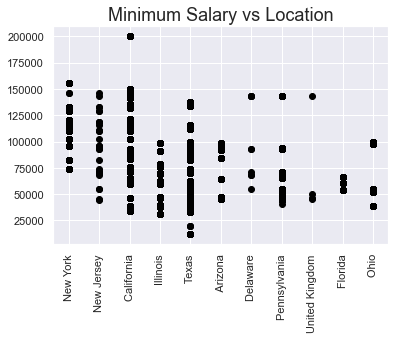

In [244]:
plt.plot(df_copy['location'], df_copy['salary_min'], 'o', color='black');
plt.xticks(rotation=90) 
plt.title('Minimum Salary vs Location',fontsize=18)

Text(0.5, 1.0, 'Maximum Salary vs Location')

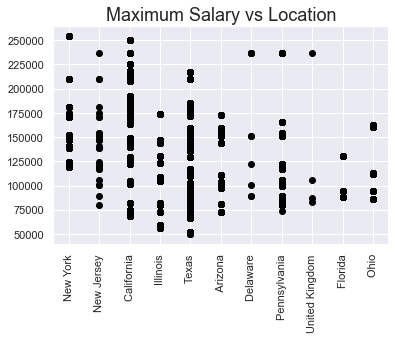

In [245]:
plt.plot(df_copy['location'], df_copy['salary_max'], 'o', color='black');
plt.xticks(rotation=90) 
plt.title('Maximum Salary vs Location',fontsize=18)

From the graph above it seems that Arizona, Delaware, Florida and Ohio have the lower salary expectation but we have also to consider the cost of life.

### What about industry?

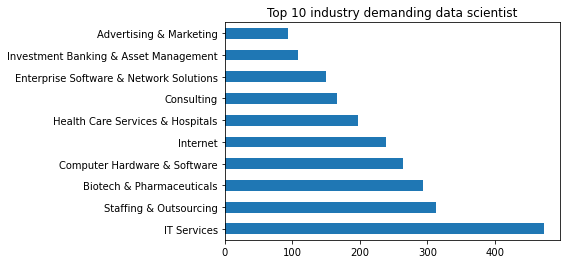

In [151]:
df_copy[df_copy['industry']!='-1']['industry'].value_counts()[:10].plot.barh()
plt.title('Top 10 industry demanding data scientist');

In [292]:
industries_to_keep =['IT Services','Staffing & Outsourcing','Biotech & Pharmaceuticals',
                    'Computer Hardware & Software','Internet','Health Care Services & Hospitals',
                    'Consulting','Enterprise Software & Network Solutions','Investment Banking & Asset Management',
                    'Advertising & Marketing']
new_df = df_copy[df_copy.industry.isin(industries_to_keep)]




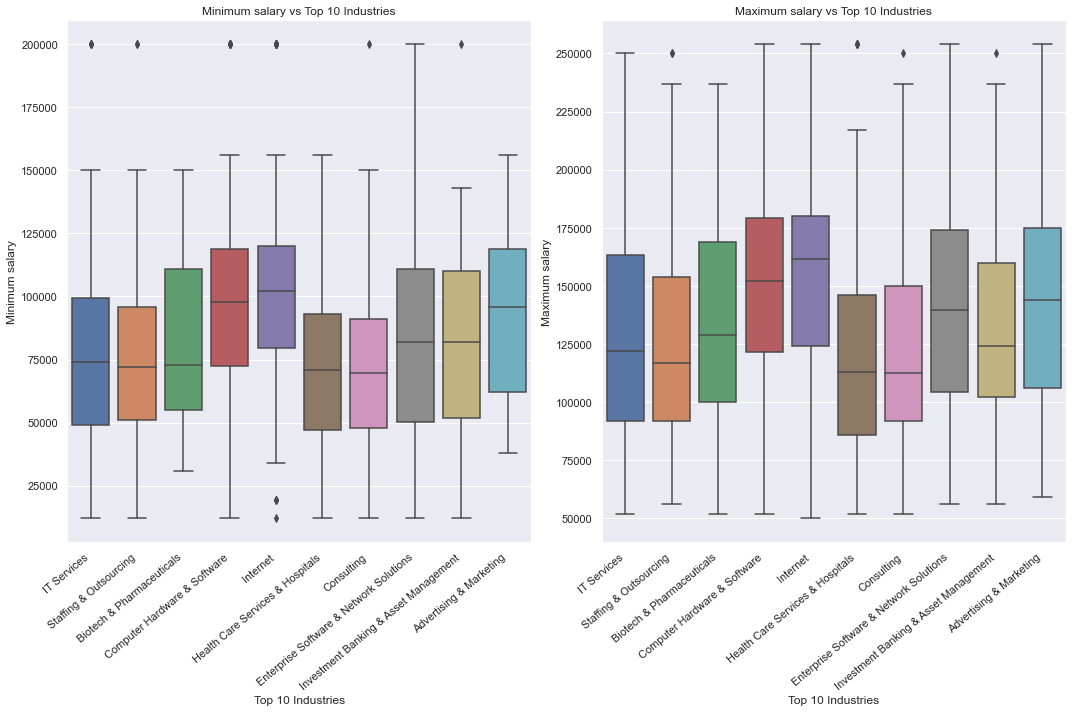

In [296]:
f, ax = plt.subplots(1, 2, figsize=(15, 10), sharex=True)

g=sns.boxplot(x="industry", y="salary_min", data=new_df,ax=ax[0],order=industries_to_keep)
g.set_title('Minimum salary vs Top 10 Industries')
g.set_xlabel('Top 10 Industries')
g.set_ylabel('Minimum salary')
g.set_xticklabels(g.get_xticklabels(),rotation=40, ha="right")


g=sns.boxplot(x="industry", y="salary_max", data=new_df,ax=ax[1],order=industries_to_keep)
g.set_title('Maximum salary vs Top 10 Industries')
g.set_xlabel('Top 10 Industries')
g.set_ylabel('Maximum salary')
g.set_xticklabels(g.get_xticklabels(),rotation=40, ha="right")

plt.tight_layout()
plt.show()

### Let's explore more in depth the salary expectation

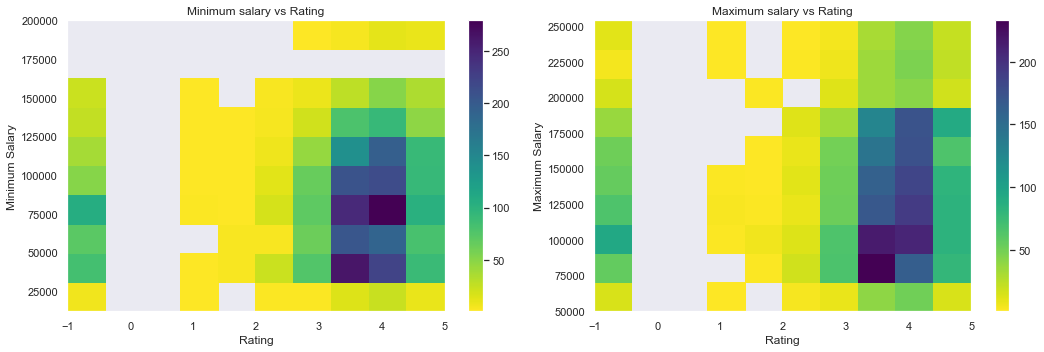

In [246]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist2d(data=df_copy,x='rating',y='salary_min',cmin=0.5,cmap='viridis_r')
plt.colorbar()
plt.title('Minimum salary vs Rating')
plt.xlabel('Rating')
plt.ylabel('Minimum Salary');


plt.subplot(1, 2, 2)
plt.hist2d(data=df_copy,x='rating',y='salary_max',cmin=0.5,cmap='viridis_r')
plt.colorbar()
plt.title('Maximum salary vs Rating')
plt.xlabel('Rating')
plt.ylabel('Maximum Salary');
#to avoid overlap between graphs
plt.tight_layout()
plt.show();

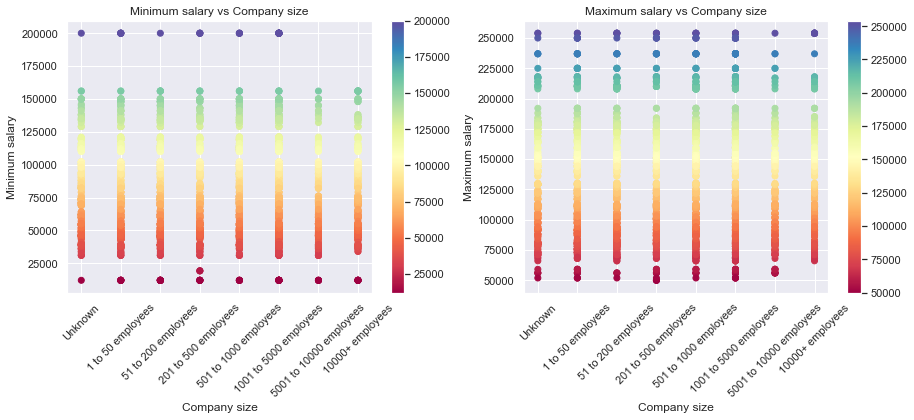

In [247]:
x_axis_values=['Unknown','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees',
            '1001 to 5000 employees','5001 to 10000 employees', '10000+ employees']

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(df_copy['size'], df_copy['salary_min'], c=df_copy['salary_min'], cmap='Spectral')
plt.colorbar()
plt.title('Minimum salary vs Company size')
plt.xlabel('Company size')
plt.ylabel('Minimum salary')
plt.xticks(ticks=range(len(x_axis_values)), labels=x_axis_values, rotation=45)

plt.subplot(1, 2, 2)
plt.scatter(df_copy['size'], df_copy['salary_max'], c=df_copy['salary_max'], cmap='Spectral')
plt.colorbar()
plt.title('Maximum salary vs Company size')
plt.xlabel('Company size')
plt.ylabel('Maximum salary')
plt.xticks(ticks=range(len(x_axis_values)), labels=x_axis_values, rotation=45)

plt.show()

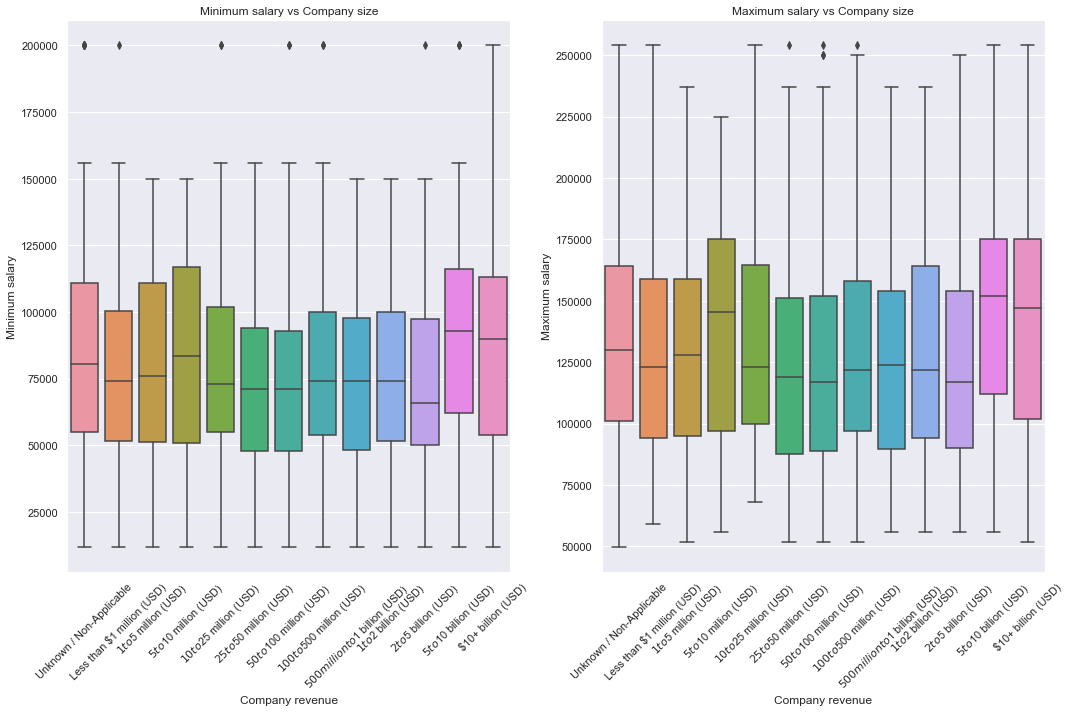

In [275]:
x_axis_values=['Unknown / Non-Applicable','Less than $1 million (USD)','$1 to $5 million (USD)',
            '$5 to $10 million (USD)','$10 to $25 million (USD)','$25 to $50 million (USD)',
            '$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)',
            '$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)']

f, ax = plt.subplots(1, 2, figsize=(15, 10), sharex=True)

g=sns.boxplot(x="revenue", y="salary_min", data=df_copy, order=x_axis_values,ax=ax[0])
g.set_title('Minimum salary vs Company size')
g.set_xlabel('Company revenue')
g.set_ylabel('Minimum salary')
g.set_xticklabels(g.get_xticklabels(),rotation=45)


g=sns.boxplot(x="revenue", y="salary_max", data=df_copy, order=x_axis_values,ax=ax[1])
g.set_title('Maximum salary vs Company size')
g.set_xlabel('Company revenue')
g.set_ylabel('Maximum salary')
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

<a id='conclusions'></a>
## Conclusions